# 015034
# Muskan Jain
# Project 1

In [2]:
#Mounting google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import pandas as pd

In [5]:
#Reading dataset
df = pd.read_csv("/gdrive/MyDrive/supermarket_sales - Sheet1.csv")

In [6]:
# 1.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
num_df = df[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating']].copy()

In [9]:
cat_df = df[['Branch','City','Customer type','Gender','Product line','Payment']]

In [22]:
y = num_df['Rating']
ds = num_df.drop('Rating',axis=1) 
ds.shape
y.shape

(1000, 7)

(1000,)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()
X = ss.fit_transform(ds)

In [25]:
from sklearn.model_selection import train_test_split
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(800, 7)

(200, 7)

In [26]:
# Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [27]:
# Design Model
inputs = tf.keras.Input(shape = X.shape[1], batch_size=None)
type(inputs)

keras.engine.keras_tensor.KerasTensor

In [28]:
# 3.1.2 Examine the tensor object
print(inputs.dtype)
print(inputs.shape)
print(inputs.name)

<dtype: 'float32'>
(None, 7)
input_1


In [29]:
# 3.2 Add layers. Each layer outputs a tensor:

x = layers.Dense(100, activation = 'relu')(inputs)

In [30]:
# 3.2.1 Get nature of 'x'

print(type(x))
print(x.shape )

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 100)


In [31]:
# 3.2.2 Examine x:

type(x)
x.shape

keras.engine.keras_tensor.KerasTensor

TensorShape([None, 100])

In [48]:
# 3.3 Add ome more layer:

x = layers.Dense(100, activation = 'relu')(x)

In [49]:
# 3.3.1
x = tf.keras.layers.concatenate([x,inputs])
out = layers.Dense(1,activation = 'sigmoid')(x)

# 3.3.1 Create model now
model = Model(inputs = [inputs], outputs = [out])

In [50]:
# 3.4 Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          800         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 107)          0           ['dense_1[0][0]',                
                                                                  'input_1[0][0]']            

In [51]:
model.compile(loss = "mean_squared_error")  
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 40.2944
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 38.5975
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 38.3641
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 38.3058
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 38.2907
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 38.2869
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 38.2859
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 38.2856
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 38.2856
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 38.2856
Epoch 11/50
25/25 [==============================] - 0s 3ms/step - loss: 38.2856
Epoch 12/50
25/25 [==============================] - 0s 3ms/step - loss: 38.2856
Epoch 13/50
25/25 [==================

In [52]:
model.evaluate(X_test,y_test)  # 2.56280517578125

7/7 [==============================] - 0s 3ms/step - loss: 39.9762


39.97624588012695

In [53]:
#4.1 Regarding train data
no_of_samples_tr = X_train.shape[0]             # Each row is one sample: 7705
input_features = X_train.shape[1]               # No of features: 178
channels = 1
batch_size_tr = no_of_samples_tr 

In [54]:
# 4.2 Regarding test data
no_of_samples_test = X_test.shape[0]           # 3795
input_features = X_test.shape[1]               # No of features. 178
channels = 1
batch_size_test = no_of_samples_test           # 3795

In [55]:
# 4.3 Reshape input train/test data as required by Keras for conv1D
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [56]:
 # 5.0 Design model

# 5.1 Inputs to model. Note that inputs is NOT
#       a part of layers object

inputs = tf.keras.Input(shape = (X.shape[1],1))

In [57]:
# 5.2 Add convolution layers to left arm
x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

# 5.2.1
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [58]:
# 5.3 Add convolution layers to right arm

x_rt = layers.Conv1D(filters = 64, kernel_size=3,activation='relu')(inputs)

# 5.3.1
x_rt = layers.Conv1D(filters = 128, kernel_size=3,activation='relu')(x_rt)


In [59]:
# 5.4 Concatenate layers & Flatten:

x = tf.keras.layers.concatenate([x_left,x_rt])
x = layers.Flatten()(x)

In [60]:
# 5.5 Add Dense (classification) layers

x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [61]:
# 5.6 Final layer & model:

out = layers.Dense(1,activation = 'sigmoid')(x)

In [62]:
# 5.7 Create model now
model1 = Model(inputs = [inputs], outputs = [out])

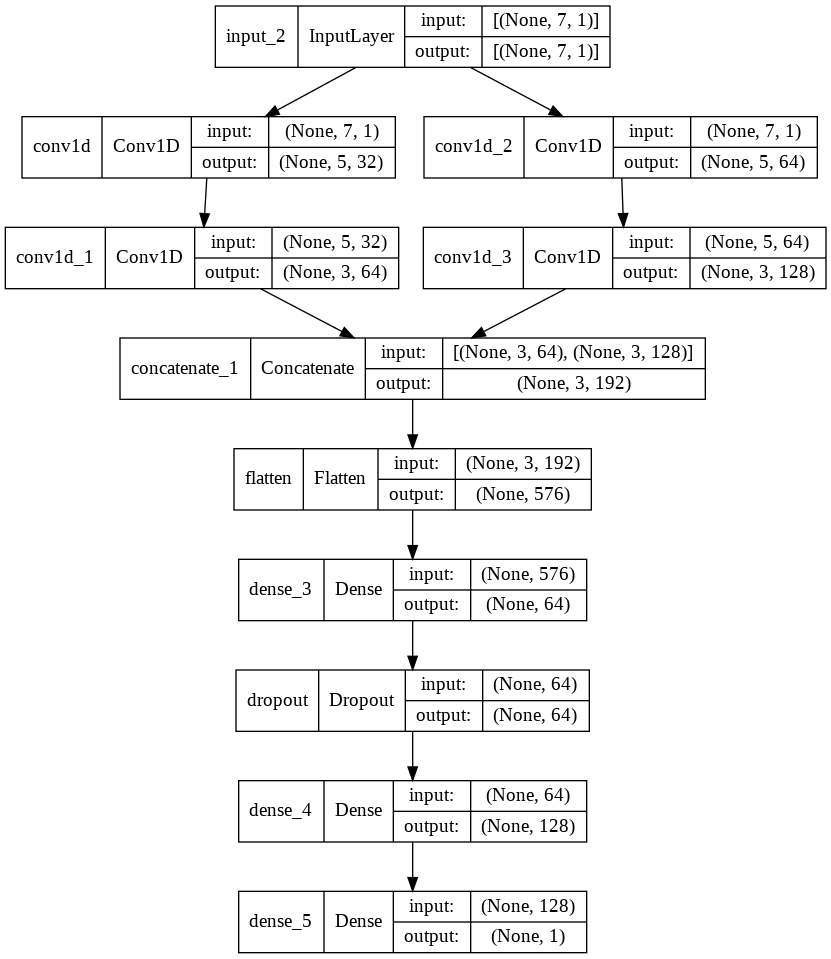

In [63]:
# 5.8 Display model now

plot_model(model1, show_shapes= True)

In [64]:
# 5.8 Compile model

model1.compile(loss = "mean_squared_error", optimizer='adam')  
history = model1.fit(
                    train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
25/25 [==============================] - 2s 8ms/step - loss: 40.2472
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 38.2879
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 38.2857
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 38.2857
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 38.2856
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 38.2857
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 38.2857
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 38.2856
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 38.2857
Epoch 10/50
25/25 [==============================] - 0s 7ms/step - loss: 38.2856
Epoch 11/50
25/25 [==============================] - 0s 8ms/step - loss: 38.2857
Epoch 12/50
25/25 [==============================] - 0s 6ms/step - loss: 38.2858
Epoch 13/50
25/25 [==================

In [65]:
# 5.9 
model1.evaluate(test,y_test) 

7/7 [==============================] - 1s 3ms/step - loss: 39.9762


39.97624588012695

In [66]:
########## Project 2 done #######